In [1]:
using LinearAlgebra
using Plots

# Questão 1 do Lab

 Manipulando algebraicamente a expressão dada no site 
 http://www.if.ufrgs.br/tex/fis01043/20011/Adriano/intro.html,
 de modo que ela se assemelhe a um sistema linear,
 chegamos à seguinte expressão:

     t é o tempo decorrido
     Tf é a temperatura final
     T0 é a temperatura inicial
     k é a uma constante a ser determinada
     

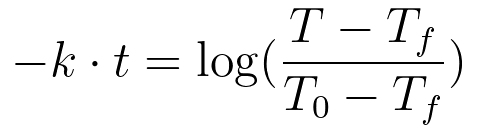


Chamando **-k** de **c**, e obtendo os valores de **Tf e T0**, podemos montar dois vetores:

    - O primeiro será "t", com os valores das horas em que foram realizadas medições de temperatura
    - O segundo será "b", com valores do lado direito da expressão dada para cada valor de temperatura medido


Assim, com esses vetores, poderemos montar um sistema linear tal que **tc=b**:


E então,usando o contrabarra como método de regressão, iremos achar o valor de **c**.
Em seguida, precisamos então ver qual valor de **t** satisfará a seguinte expressão, correspondente à temperatura de **37** graus no sistema:

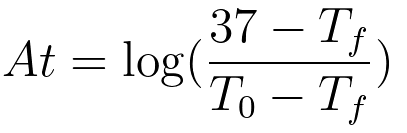
    

In [2]:
#Questão 1 do Lab
function f_log(T,T0,Tf)
    return log((T-Tf)/(T0-Tf))
end
#Determinando valores iniciais
T = [ 34,30,25 ]
T0 = 34
Tf = 20
b = [ f_log(i,T0,Tf) for i in T ] 
t = [0,1.5,2.5]
# Dado que At=b, para acharmos A:
c = t\b
resultado = c\(f_log(37,T0,Tf))

print("\nO crime ocorreu a ",resultado*60," minutos antes da chegada dos investigadores.\n",
        "Isto é, aproximadamente às 14h", Int(trunc(60 + resultado*60)))



O crime ocorreu a -32.162190991084906 minutos antes da chegada dos investigadores.
Isto é, aproximadamente às 14h27

In [3]:

# Gerando aleatoriamente um polinomio de grau 5 com coeficientes inteiros entre -100 e 100.

coef = [ rand(-100:100) for i in 1:6 ]

#gerando 30 valores aleatorios de x entre -10 e 10
x_values = [ (rand() * 10 * ((-1)^rand([1,2]) )) for i in 1:30]
x_values = sort(x_values)
nothing

In [30]:
#Questão 2 do lab



#  Funçao recebe x e o valor dos coeficientes
function pol_5(x,coeficientes)
    xs= [ x^i for i in 0:5 ]
    return xs'*coeficientes
end

# # Gerando aleatoriamente um polinomio de grau 5 com coeficientes inteiros entre -100 e 100.

# coef = [ rand(-100:100) for i in 1:6 ]

# #gerando 30 valores aleatorios de x entre -10 e 10
# x_values = [ (rand() * 10 * ((-1)^rand([1,2]) )) for i in 1:30]

# gerando os 30 pontos (x,y)
y_values = [ pol_5(x,coef) for x in x_values ]

# Fazendo função que monta a matriz de Vandermonde para x e o grau dado.

function vandermonde(x_values,grau)
    l = size(x_values)[1]
    c = grau+1
    vandermonde = zeros(l,c)

    for i in 1:l  #para cada linha
        for j in 1:c
            vandermonde[i,j] = x_values[i]^(j-1)
        end
    end
    return vandermonde
end


plot(x_values,y_values,label=:"Polinômio")

# Funcao retorna os valores de y para a regressao polinomial do grau dado, e os coeficientes.

function reg_pol(grau,x_values,y_values)     
# Regressão linear consiste em achar os (grau+1) coeficientes para os valores de x e y dado.
# Para isso, precisamos de uma matriz de vandermond para os n valores de x com (grau+1) elementos em cada linha
    V = vandermonde(x_values,grau)
    coef = V\y_values
    result = [V*coef,coef]
    return result
end




# vendo se ele acerta os coeficientes para o caso do grau 5
# display(reg_pol(5,x_values,y_values)[2])
# display(coef)
#calculando os valores de y para a regressao de um polinomio de grau 0:29
y_regvalues = []
for i in 0:29
    push!(y_regvalues,reg_pol(i,x_values,y_values)[1])
end

plot(x_values,y_values,label="Polinomio original")
plot!(x_values,y_regvalues[6],label="regressao")
reg_pol(29,x_values,y_values)[1]


30-element Vector{Float64}:
       4.437414096108969e6
       3.017218467780302e6
       1.9355410881182472e6
  481483.3577542046
  190021.43596358737
  137351.95482208353
   99743.28224598416
   89976.37350139122
   28326.935612778172
   21896.66112379728
    8261.648402659259
     -21.36031508211658
     -30.198399497132023
       ⋮
 -125185.67960719539
 -330590.9939545631
 -338011.30187420314
 -393716.8356428919
 -693177.1762348468
 -816692.1423152974
 -952683.6442371056
      -1.2854818111561858e6
      -2.265866069859702e6
      -2.3976757740234123e6
      -3.8333719730733475e6
      -4.314469990967041e6